In [1]:
import os
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
rootPath = './cat_vs_dog/'

In [3]:
imageGenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20, 
    width_shift_range=0.1, 
    height_shift_range=0.1, 
    brightness_range=[.2, .2],
    horizontal_flip=True,
    validation_split=.1
    
)

In [4]:
#훈련데이터 생성기
trainGen = imageGenerator.flow_from_directory(
        os.path.join(rootPath, 'training_set/training_set'),
        target_size=(64, 64),
        subset='training'
)

Found 7205 images belonging to 2 classes.


In [5]:
# 검증 데이터 생성기
validationGen = imageGenerator.flow_from_directory(
    os.path.join(rootPath, 'training_set/training_set'),
    target_size=(64, 64),
    subset='validation'
)

Found 800 images belonging to 2 classes.


## 모델 구성

## CNN 모델구성

In [6]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [7]:
#모델 시퀀스 생성 
model = Sequential()

In [8]:

# 모델 입력값 (64,64,3 ) = (width, height, color)
model.add(layers.InputLayer(input_shape=(64,64,3)))
model.add(layers.Conv2D(16, (3,3), (1,1), 'same',activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(rate=0.3))


#
model.add(layers.Conv2D(32, (3,3), (1,1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(rate=0.3))

#
model.add(layers.Conv2D(64, (3,3), (1,1), 'same', activation='relu'))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(rate=0.3))

#
model.add(layers.Flatten())
model.add(layers.Dense(512, activation='relu'))
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 32, 32, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 32, 32, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        1

In [9]:

trainGen.samples

7205

In [10]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

In [11]:
epochs = 10 
history = model.fit(
    trainGen, 
    epochs = epochs,
    steps_per_epoch = trainGen.samples / epochs,
    validation_data = validationGen,
    validation_steps = trainGen.samples / epochs,
)

Epoch 1/10
226/720 [========>.....................] - 74s 326ms/step - loss: 0.6915 - accuracy: 0.5214 - val_loss: 0.6818 - val_accuracy: 0.5900


## 학습결과 시각화 및 평가

In [19]:
import matplotlib.pyplot as plt


In [20]:
def show_graph(history_dict):
    accuracy = history_dict['accuracy']
    val_accuracy = history_dict['val_accuracy']
    loss = history_dict['loss']
    val_loss = history_dict['val_loss']

    epochs = range(1, len(loss) + 1)
    
    plt.figure(figsize=(16, 1))
    
    plt.subplot(121)
    plt.subplots_adjust(top=2)
    plt.plot(epochs, accuracy, 'ro', label='Training accuracy')
    plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
    plt.title('Trainging and validation accuracy and loss')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy and Loss')

    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
              fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, -0.1))

    plt.subplot(122)
    plt.plot(epochs, loss, 'bo', label='Training loss')
    plt.plot(epochs, val_loss, 'b', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.1),
          fancybox=True, shadow=True, ncol=5)
#     plt.legend(bbox_to_anchor=(1, 0))

    plt.show()

ValueError: x and y must have same first dimension, but have shapes (32,) and (1,)

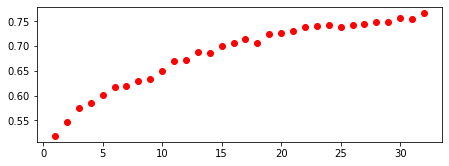

In [21]:
show_graph(history.history)
